In [28]:
%matplotlib inline
import os, sys
from importlib import reload
import numpy as np

import matplotlib.pyplot as plt

import torch
print(torch.__version__)

from IPython.core.display import display, HTML, clear_output
display(HTML("<style>.container { width:90% !important; }</style>"))

sys.path.append('..')
import pytorchnet

os.environ['CUDA_VISIBLE_DEVICES'] = '1'

0.4.1


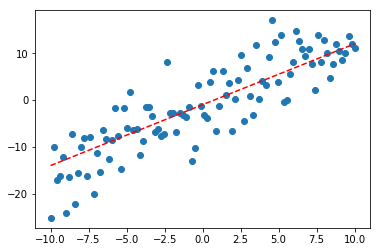

In [29]:
batchSize=100
noiseScale=5.0
m=1.3
b=-1.0
x=np.linspace(-10,10,batchSize)
y=(x*m+b)+np.random.normal(scale=noiseScale,size=(batchSize,))

plt.scatter(x,y)
plt.plot(x,(x*m+b),'r--')

0 8.170584678649902
1000 4.457581996917725
2000 3.843695878982544
3000 3.8425040245056152
4000 3.8415889739990234
5000 3.8414242267608643
6000 3.8414227962493896
7000 3.8414306640625
8000 3.841434955596924
9000 3.8414223194122314
1.3 -1.0 1.3300033807754517 -1.072853684425354


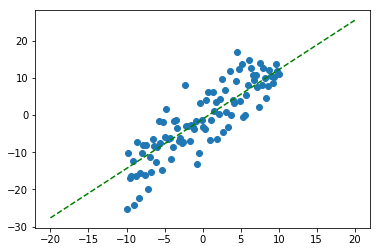

In [30]:

mb=torch.zeros((2,),requires_grad=True).float()
xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam([mb])

iters=10000

for i in range(iters):
    opt.zero_grad()
    line=xt*mb[0]+mb[1]
    lossval=loss(line,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)

xx=np.linspace(-20,20,200)
mm,bb=mb.data.numpy().tolist() # guessed m and b
plt.plot(xx,(xx*mm+bb),'g--')

print(m,b,mm,bb)

0 8.170570373535156
1000 3.699268102645874
2000 3.6914050579071045
3000 3.691758155822754
4000 3.6917924880981445
5000 3.6921961307525635
6000 3.6913201808929443
7000 3.691535711288452
8000 3.693206548690796
9000 3.691293239593506
1.3 -1.0 1.5179213 -1.4137092


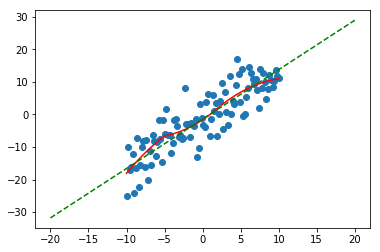

In [32]:
net=pytorchnet.LinearNet(1,2,[20,10,5])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    mbt=net(xt)
    line=xt*mbt[:,0]+mbt[:,1]
    lossval=loss(line,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)
plt.plot(x,line.data.numpy(),'r')

xx=np.linspace(-20,20,200)
mm,bb=mbt.mean(0).data.numpy() # guessed m and b
plt.plot(xx,(xx*mm+bb),'g--')

print(m,b,mm,bb)

0 8.17058277130127
1000 3.8367295265197754
2000 3.8338027000427246
3000 3.833526849746704
4000 3.833402156829834
5000 3.833383083343506
6000 3.8337082862854004
7000 3.83335018157959
8000 3.8336617946624756
9000 3.8334314823150635


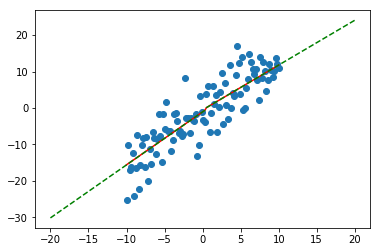

In [31]:
net=pytorchnet.LinearNet(1,1,[20,10,5])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y[:,np.newaxis]).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    pred=net(xt)
    lossval=loss(pred,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)
plt.plot(x,pred.data.numpy(),'r')

xx=np.linspace(-20,20,200)
plt.plot(xx,net(torch.from_numpy(xx).float()).data.numpy(),'g--')

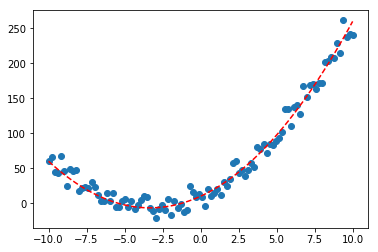

In [68]:
batchSize=100
noiseScale=10.0

a=1.5
b=10 
c=10 

x=np.linspace(-10,10,batchSize)
y=a*(x*x)+b*x+c+np.random.normal(scale=noiseScale,size=(batchSize,))

plt.scatter(x,y)
plt.plot(x,(a*(x*x)+b*x+c),'r--')

0 64.70843505859375
1000 10.742517471313477
2000 9.342046737670898
3000 8.383206367492676
4000 7.773587703704834
5000 7.755258083343506
6000 7.756544589996338
7000 7.749738693237305
8000 7.747148036956787
9000 7.743716239929199


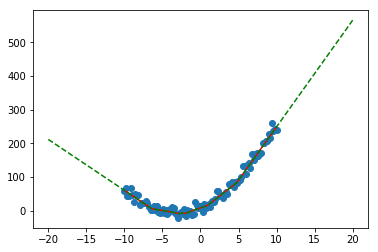

In [70]:
net=pytorchnet.LinearNet(1,1,[20,10,5])
net.apply(pytorchnet.normalInit)

xt=torch.from_numpy(x).float()
yt=torch.from_numpy(y[:,np.newaxis]).float()

loss=torch.nn.L1Loss()
opt=torch.optim.Adam(net.parameters())

iters=10000

for i in range(iters):
    opt.zero_grad()
    pred=net(xt)
    lossval=loss(pred,yt)
    
    lossval.backward()
    opt.step()
    
    if i%(iters//10)==0:
        print(i,lossval.item())
        
plt.scatter(x,y)
plt.plot(x,pred.data.numpy(),'r')

xx=np.linspace(-20,20,200)
plt.plot(xx,net(torch.from_numpy(xx).float()).data.numpy(),'g--')